In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
data = pd.read_csv('clean_data.csv')
df = data.copy()

In [77]:
df.head()

,Street,Ward,District,Prices,Area,toFace,type,certificate,width,length,floors
0,Hà Mục,Hòa Thọ Đông,cẩm lệ,5.15,100.0,Tây Nam,True,False,5.0,20.000000,4
1,Thi Sách,Hòa Thuận Tây,hải châu,4.10,85.0,Không,True,False,42.5,42.500000,1
2,Ông Ích Khiêm,Tam Thuận,thanh khê,11.00,67.0,Tây,True,True,3.8,17.631579,3
3,Núi Thành,Hòa Cường Bắc,hải châu,17.50,137.0,Tây,True,True,7.3,18.767123,3
4,Trương Văn Hiến,Khuê Mỹ,ngũ hành sơn,7.00,90.0,Đông Nam,True,True,5.0,18.000000,4


## Outlier

In [78]:
uppper_boundary=df['Prices'].mean() + 3* df['Prices'].std()
lower_boundary=df['Prices'].mean() - 3* df['Prices'].std()
print("Biên trên:",uppper_boundary)

Biên trên: 42.092464426516216


In [79]:
df.loc[(df.Prices>uppper_boundary),'Prices'] = uppper_boundary

<Axes: xlabel='Prices', ylabel='Count'>

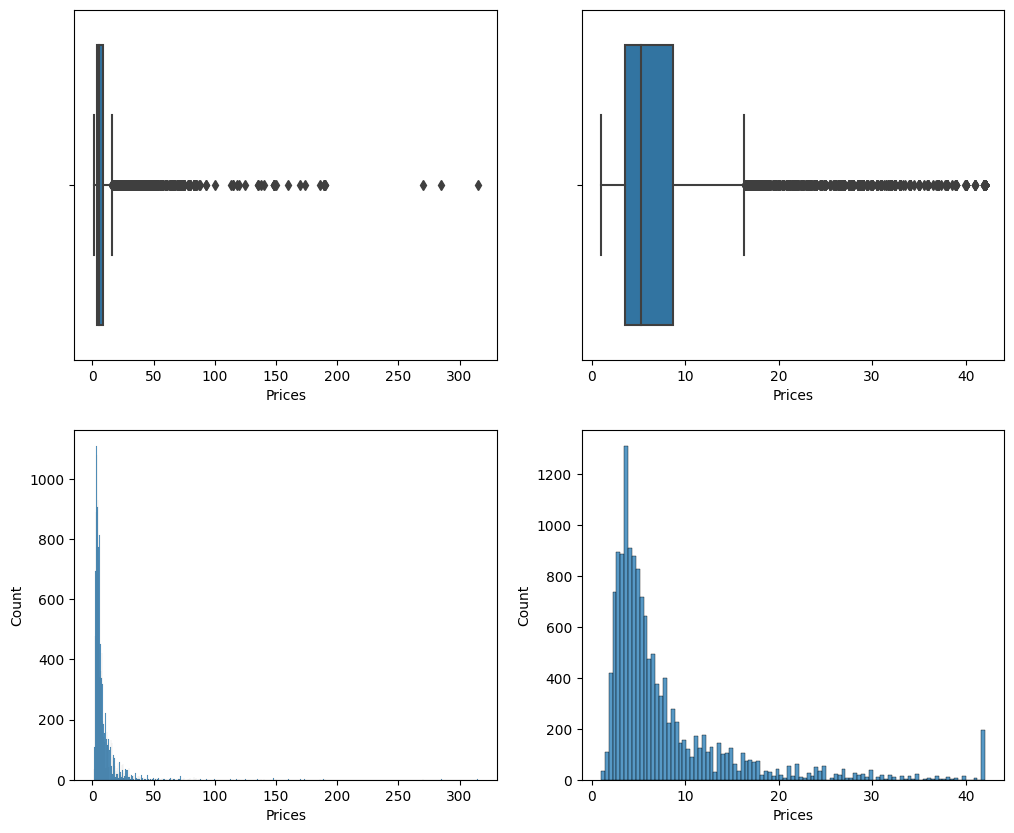

In [80]:
fig, axes = plt.subplots(ncols=2,nrows=2, figsize=(12,10))
sns.boxplot(data=data,x='Prices',ax=axes[0][0])
sns.boxplot(data=df,x='Prices',ax=axes[0][1])
sns.histplot(data=data,x='Prices',ax=axes[1][0])
sns.histplot(data=df,x='Prices',ax=axes[1][1])

In [81]:
uppper_boundary=df['Area'].mean() + 3* df['Area'].std()
print("Biên trên:",uppper_boundary)

Biên trên: 279.3999628710352


In [82]:
df.loc[(df.Area>uppper_boundary),'Area'] = uppper_boundary

<Axes: xlabel='Area', ylabel='Count'>

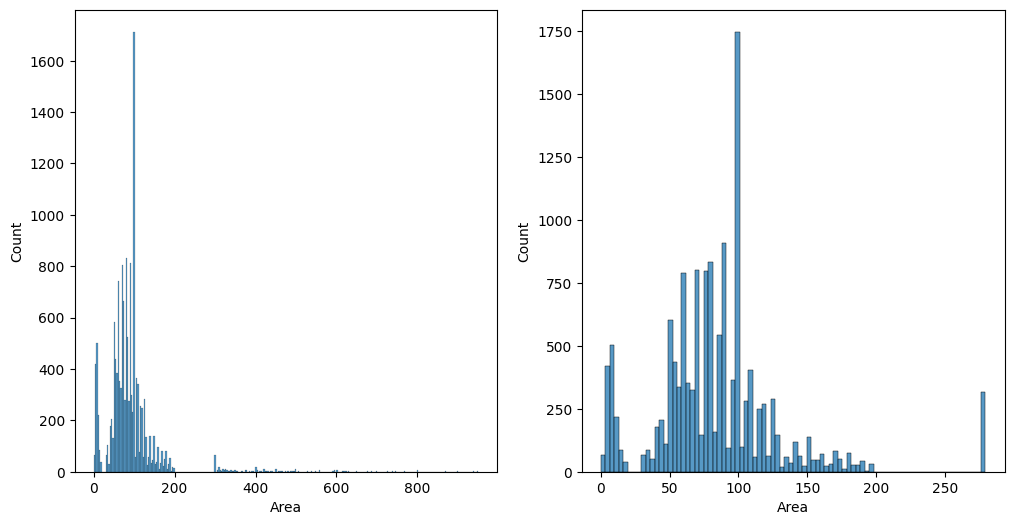

In [83]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.histplot(data=data,x='Area',ax=axes[0])
sns.histplot(data=df,x='Area',ax=axes[1])

In [84]:
uppper_boundary=df['floors'].mean() + 3* df['floors'].std()
print("Biên trên:",uppper_boundary)

Biên trên: 8.598275267243865


In [85]:
df.loc[(df.floors>uppper_boundary),'floors']=int(uppper_boundary)

<Axes: xlabel='floors'>

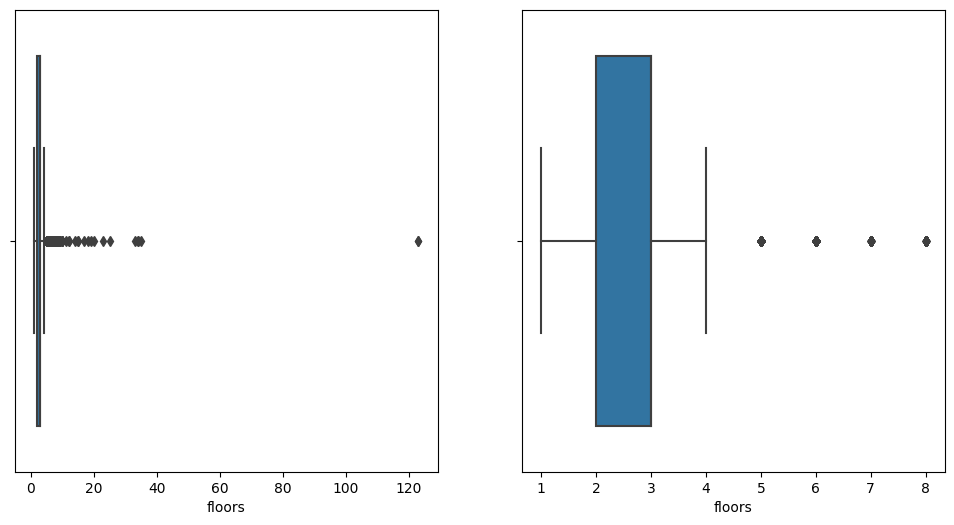

In [86]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data=data,x='floors',ax=axes[0])
sns.boxplot(data=df,x='floors',ax=axes[1])

In [87]:
uppper_boundary=df['width'].mean() + 3* df['width'].std()
print("Biên trên:",uppper_boundary)
df.loc[(df.width>uppper_boundary),'width'] = uppper_boundary

Biên trên: 69.71582646803324


<Axes: xlabel='width'>

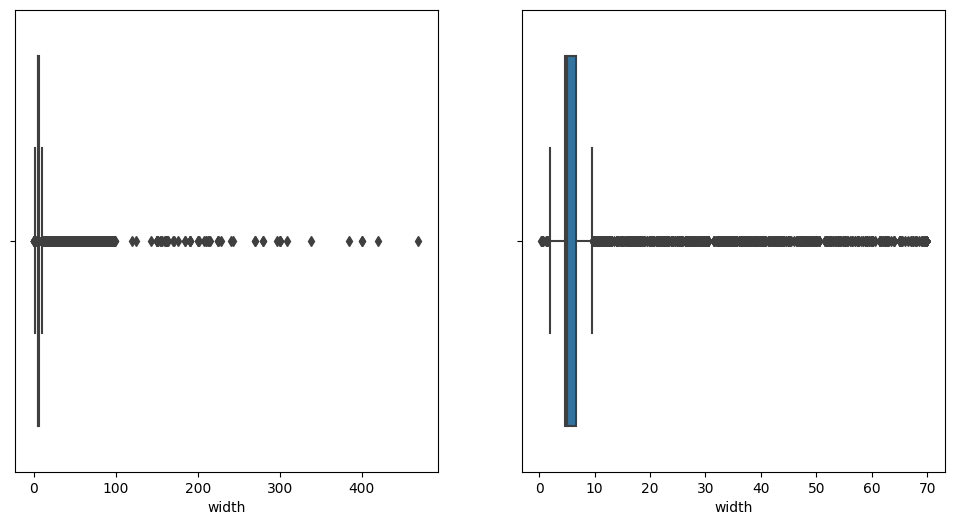

In [88]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data=data,x='width',ax=axes[0])
sns.boxplot(data=df,x='width',ax=axes[1])

In [89]:
uppper_boundary=df['length'].mean() + 3* df['length'].std()
print("Biên trên:",uppper_boundary)
df.loc[(df.length>uppper_boundary),'length'] = uppper_boundary

Biên trên: 108.2755979999045


<Axes: xlabel='length'>

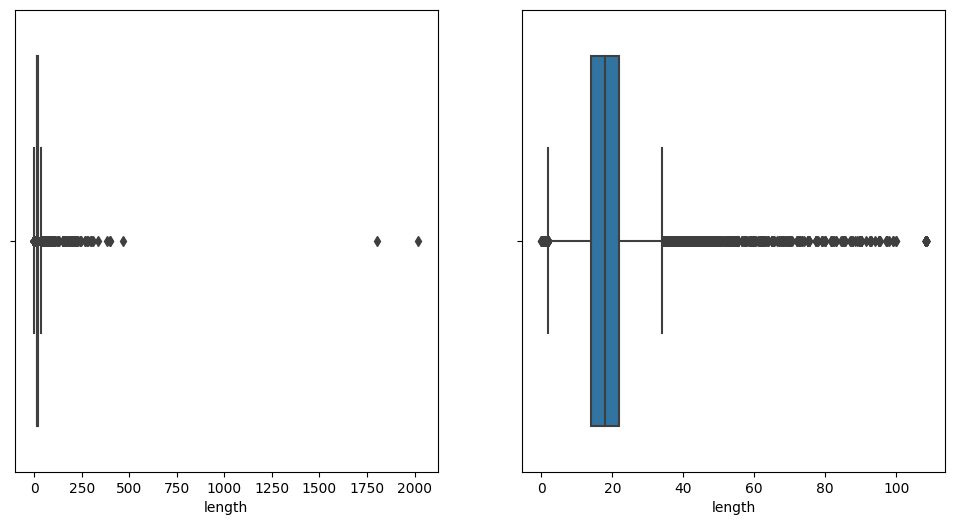

In [90]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data=data,x='length',ax=axes[0])
sns.boxplot(data=df,x='length',ax=axes[1])

## Feature Transformation

In [91]:
import scipy.stats as stat
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist() # histogram
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=plt)# prob plot
    plt.show()

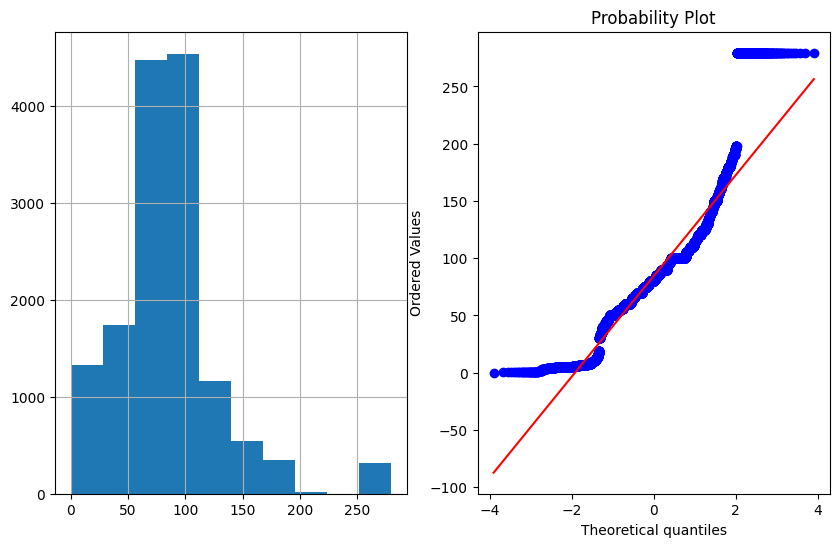

In [92]:
plot_data(df,'Area')

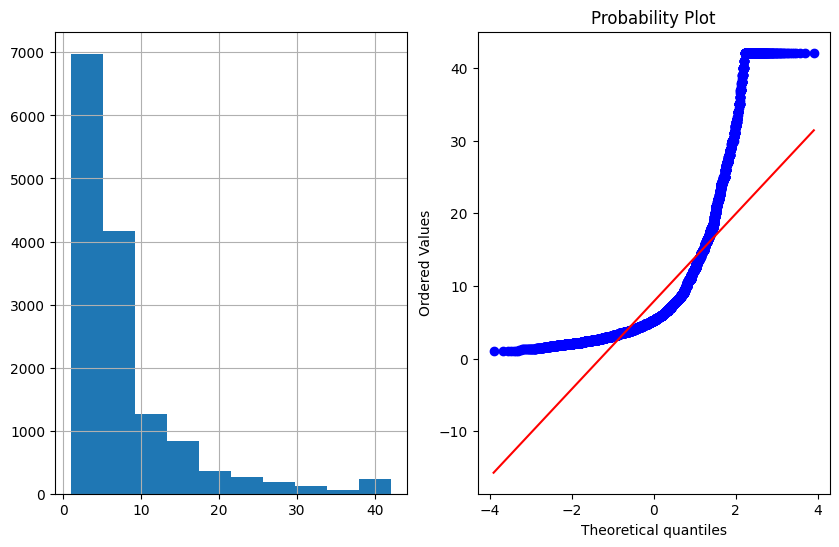

In [93]:
plot_data(df,'Prices')

In [94]:
# from sklearn.preprocessing import PowerTransformer


# scaler = PowerTransformer()

# df['Prices_normalizer'] = (scaler.fit_transform(df[['Prices']]))


In [95]:
# plot_data(df,'Prices_normalizer')

## Create new Feature


In [96]:
data_test =df.sample(n=1000)

In [97]:
data_test.head()

,Street,Ward,District,Prices,Area,toFace,type,certificate,width,length,floors
212,Nguyễn Phước Nguyên,An Khê,thanh khê,6.2,93.000000,Không,True,True,5.0,18.600000,3
14388,Mỹ An 16,Mỹ An,ngũ hành sơn,10.8,110.000000,Đông Bắc,True,True,5.0,22.000000,4
4240,Chi Lăng,Hải Châu II,hải châu,24.5,108.000000,Đông Bắc,True,True,5.0,21.600000,6
12851,Phước Trường,Phước Mỹ,sơn trà,35.0,40.000000,Không,True,True,10.0,24.000000,5
6636,Nguyễn Văn Thoại,Mỹ An,ngũ hành sơn,18.0,279.399963,Không,True,True,5.0,108.275598,7


In [98]:
data_test['Street'].unique()

array([' Nguyễn Phước Nguyên', ' Mỹ An 16', ' Chi Lăng', ' Phước Trường',
       ' Nguyễn Văn Thoại', ' Mẹ Nhu', ' Trần Khánh Dư', ' Võ Chí Công',
       ' Đào Công Soạn', ' Tiểu La', ' Hoàng Minh Thảo', ' Trường Chinh',
       ' 2/9', ' Bùi Dương Lịch', ' Hà Huy Tập', ' Thanh Lương 16',
       ' Lê Thạch', ' Nguyễn Trung Ngạn', ' Tô Hiệu', ' An Thượng 38',
       ' Nguyễn Phan Vinh', ' Ông Ích Khiêm', ' Phạm Như Xương', ' 3/2',
       ' Nguyễn Thiện Kế', ' Lê Văn Hiến', ' Âu Cơ', ' Ba ĐÌnh',
       ' Ngô Quyền', ' Nguyễn Văn Linh', ' Tống Phước Phổ',
       ' Cách Mạng Tháng 8', ' Phan Triêm', ' Bình Hòa 2',
       ' Phạm Hồng Thái', ' Nguyễn Thanh Năm', ' Lý Tự Trọng',
       ' Châu Thị Vĩnh Tế', ' Bằng Lăng 1', ' Nguyễn Nho Túy',
       ' Hải Phòng', ' Đặng Đình Vân', ' Tiên Sơn 8', ' Hải Hồ',
       ' Hàn Mạc Tử', ' Phạm Văn Nghị', ' Nguyễn Trãi', ' Hoàng Diệu',
       ' Tú Quỳ', ' Phạm Tu', ' Hồ Tông Thốc', ' Trưng Nữ Vương',
       ' Đặng Vũ Hỷ', ' Lê Duẩn', ' Trịnh Đình Thảo', '